In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [273]:
data_file = '../data/auto-mpg.csv'
header = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleraion', 'model_year', 'origin', 'car_name']
mpgDF = pd.read_csv(data_file, sep='\s+', names=header)
mpgDF

,mpg,cylinders,displacement,horsepower,weight,acceleraion,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [274]:
mpgDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleraion   398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [275]:
mpgDF.duplicated().sum()

0

In [276]:
mpgDF['horsepower'].replace('?', '0', inplace=True)

mpgDF['horsepower']=mpgDF['horsepower'].astype(float)
mpgDF

,mpg,cylinders,displacement,horsepower,weight,acceleraion,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [277]:
mpgDF = mpgDF.drop(['car_name', 'origin'], axis=1)
mpgDF

,mpg,cylinders,displacement,horsepower,weight,acceleraion,model_year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82
394,44.0,4,97.0,52.0,2130.0,24.6,82
395,32.0,4,135.0,84.0,2295.0,11.6,82
396,28.0,4,120.0,79.0,2625.0,18.6,82


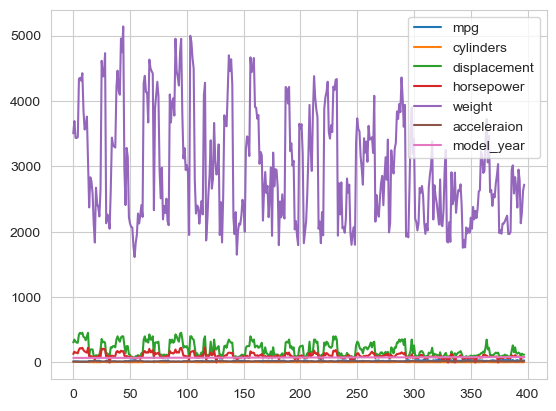

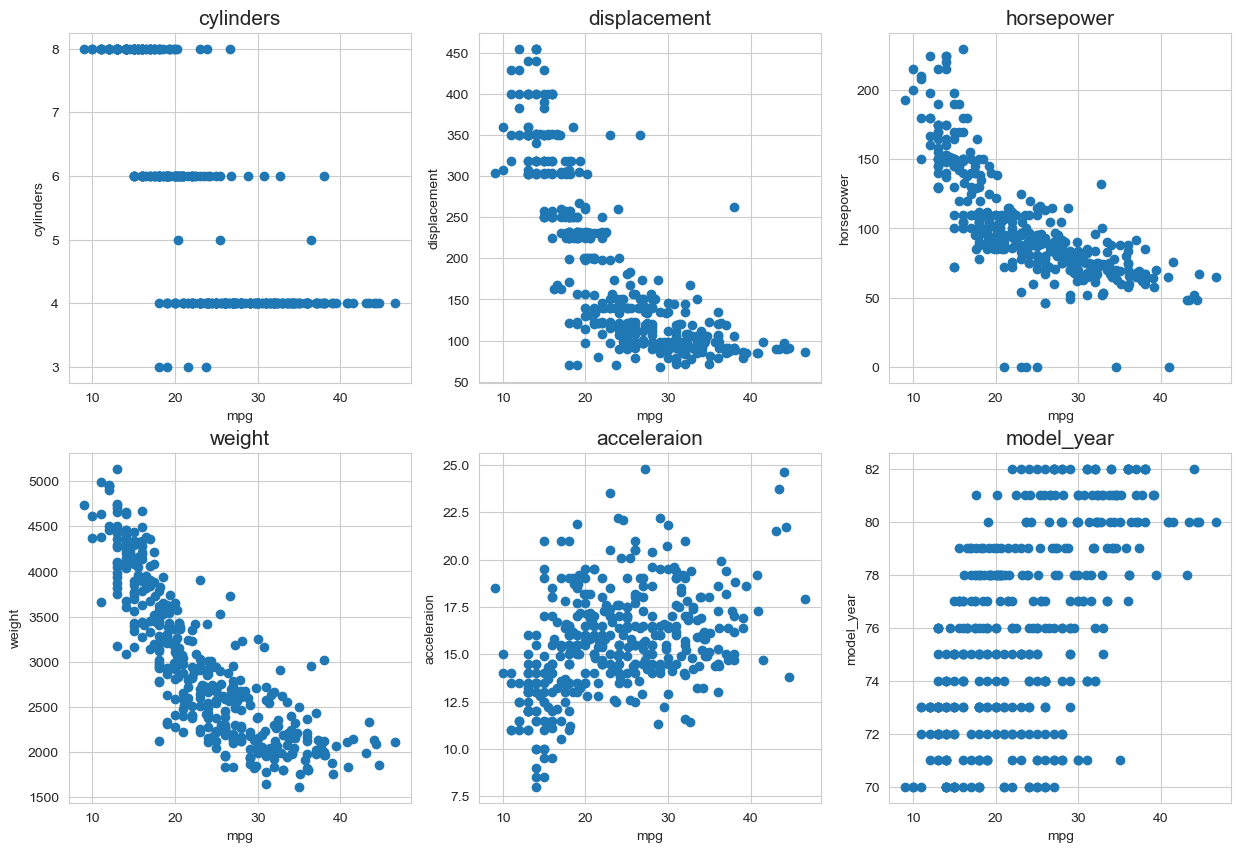

In [278]:
plt.plot(mpgDF, label=mpgDF.columns)
plt.legend()
plt.show()
plt.figure(figsize=(15,10))
for i in range(1,7):
    plt.subplot(2,3,i)
    plt.scatter(mpgDF['mpg'], mpgDF[mpgDF.columns[i]])
    plt.xlabel(mpgDF.columns[0])
    plt.ylabel(mpgDF.columns[i])
    plt.title(mpgDF.columns[i], fontsize=15)
plt.tight_layout
plt.show()

In [279]:
targetDF = mpgDF.mpg
targetDF

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [280]:
featureDF = mpgDF[mpgDF.columns[1:]]
featureDF

,cylinders,displacement,horsepower,weight,acceleraion,model_year
0,8,307.0,130.0,3504.0,12.0,70
1,8,350.0,165.0,3693.0,11.5,70
2,8,318.0,150.0,3436.0,11.0,70
3,8,304.0,150.0,3433.0,12.0,70
4,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82
394,4,97.0,52.0,2130.0,24.6,82
395,4,135.0,84.0,2295.0,11.6,82
396,4,120.0,79.0,2625.0,18.6,82


In [281]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


X_train, X_test, y_train, y_test = train_test_split(featureDF,
                                                    targetDF,
                                                    random_state=7,
                                                    test_size=0.3)


In [282]:
ScalerList = [StandardScaler(), MinMaxScaler(), RobustScaler(), PolynomialFeatures()]
model = LinearRegression()

def ML(degreeN, include_biasTF):
    for idx, i in enumerate(ScalerList):
        scaler = i
        if idx==3:
            i.degree=degreeN
            i.include_bias=include_biasTF
            scaler = i
        scaler.fit(X_train)
        train = scaler.transform(X_train)
        test = scaler.transform(X_test)
        model.fit(train, y_train)
        train_score = model.score(train, y_train)
        test_score = model.score(test, y_test)
        print(f'{idx+1}) {i} : Train_score : {train_score*100:.3f}% --- Test Score : {test_score*100:.3f}%', end=' ')
        print(f'\t Fit :  {(test_score-train_score)*100:.3f}%', end='')
        if train_score > test_score:
            print('(과대적합)')
        elif test_score<50 and train_score < 50:
            print('(과소적합)')
        else:
            print()
        print(f'\tPredict_score : {test_score*100:.3f}%')
        y_pred = model.predict(train)
        r2 = r2_score(y_train, y_pred)
        mse = mean_squared_error(y_train, y_pred)
        rmse = mean_squared_error(y_train, y_pred, squared=False)
        mae = mean_absolute_error(y_train, y_pred)
        print(f'\tR2 : {r2:.3f}, MSE : {mse:.3f}, RMSE : {rmse:.3f}, MAE : {mae:.3f}')
        print()

ML(2,True)


1) StandardScaler() : Train_score : 83.068% --- Test Score : 73.465% 	 Fit :  -9.604%(과대적합)
	Predict_score : 73.465%
	R2 : 0.831, MSE : 10.739, RMSE : 3.277, MAE : 2.525

2) MinMaxScaler() : Train_score : 83.068% --- Test Score : 73.465% 	 Fit :  -9.604%(과대적합)
	Predict_score : 73.465%
	R2 : 0.831, MSE : 10.739, RMSE : 3.277, MAE : 2.525

3) RobustScaler() : Train_score : 83.068% --- Test Score : 73.465% 	 Fit :  -9.604%(과대적합)
	Predict_score : 73.465%
	R2 : 0.831, MSE : 10.739, RMSE : 3.277, MAE : 2.525

4) PolynomialFeatures() : Train_score : 81.706% --- Test Score : 56.639% 	 Fit :  -25.067%(과대적합)
	Predict_score : 56.639%
	R2 : 0.817, MSE : 11.603, RMSE : 3.406, MAE : 2.503
